# Image Data Augmentation Exercise : CIFAR-100
---
## 데이터가 더 부족한 세상으로!

[여기 참고](https://www.cs.toronto.edu/~kriz/cifar.html)

## Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets.cifar100 import load_data

In [34]:
(train_x, train_y), (test_x, test_y) = load_data()
# (train_x, train_y), (test_x, test_y) = load_data(label_mode='coarse')

In [3]:
np.unique(train_y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [4]:
label_dict = {0:'apple', 1: 'aquarium_fish', 2: 'baby', 3: 'bear', 4: 'beaver', 5: 'bed', 6: 'bee', 7: 'beetle', 8: 'bicycle', 9: 'bottle',
              10: 'bowl', 11: 'boy',12: 'bridge',13: 'bus',14: 'butterfly',15: 'camel',16: 'can',17: 'castle',18: 'caterpillar',19: 'cattle',
              20: 'chair',21: 'chimpanzee',22: 'clock',23: 'cloud',24: 'cockroach',25: 'couch',26: 'cra',27: 'crocodile',28: 'cup',29: 'dinosaur',
              30: 'dolphin',31: 'elephant',32: 'flatfish',33: 'forest',34: 'fox',35: 'girl',36: 'hamster',37: 'house',38: 'kangaroo',39: 'keyboard',
              40: 'lamp',41: 'lawn_mower',42: 'leopard',43: 'lion',44: 'lizard',45: 'lobster',46: 'man',47: 'maple_tree',48: 'motorcycle',49: 'mountain',
              50: 'mouse',51: 'mushroom',52: 'oak_tree',53: 'orange',54: 'orchid',55: 'otter',56: 'palm_tree',57: 'pear',58: 'pickup_truck',59: 'pine_tree',
              60: 'plain',61: 'plate',62: 'poppy',63: 'porcupine',64: 'possum',65: 'rabbit',66: 'raccoon',67: 'ray',68: 'road',69: 'rocket',
              70: 'rose',71: 'sea',72: 'seal',73: 'shark',74: 'shrew',75: 'skunk',76: 'skyscraper',77: 'snail',78: 'snake',79: 'spider',
              80: 'squirrel',81: 'streetcar',82: 'sunflower',83: 'sweet_pepper',84: 'table',85: 'tank',86: 'telephone',87: 'television',88: 'tiger',89: 'tractor',
              90: 'train',91: 'trout',92: 'tulip',93: 'turtle',94: 'wardrobe',95: 'whale',96: 'willow_tree',97: 'wolf',98: 'woman',99: 'worm'
            }

label_dict[0]

'apple'

* 데이터 살펴보기

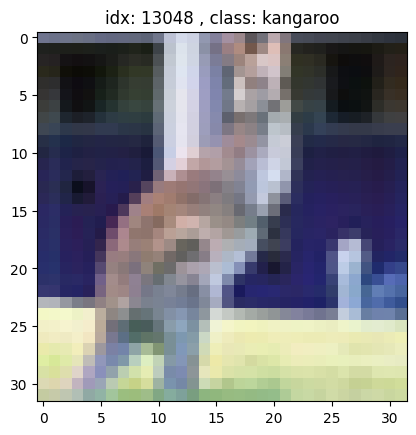

In [5]:
rand_i = np.random.randint(0, train_x.shape[0])

plt.title(f'idx: {rand_i} , class: { label_dict[train_y[rand_i][0]] }')
plt.imshow( train_x[rand_i] )
plt.show()

In [6]:
# rows = 5
# fig, axes = plt.subplots(rows, len(label_dict), figsize=(len(label_dict), rows) )

# for img_id in range(len(label_dict)) :
#     imgs = train_x[train_y.reshape(-1)==img_id]
#     imgs_len = len(imgs)

#     for row_i in range(rows) :
#         axe = axes[row_i, img_id]
#         axe.imshow( imgs[np.random.randint(imgs_len)], interpolation='none' )
#         axe.axis('off')

# plt.tight_layout()
# plt.show()

## Data Preprocessing

* Data split
    - training set : test set = 8 : 2
    - training set : validation set = 8 : 2
    - 재연을 위한 난수 고정 : 2023

In [35]:
train_x.shape, train_y.shape, test_x.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3))

In [36]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=2023)

In [37]:
train_x.shape, val_x.shape, test_x.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

* Scaling

    - min-max scaling

In [38]:
max_n, min_n = train_x.max(), train_x.min()
max_n, min_n

(255, 0)

In [39]:
train_x = (train_x - max_n)/(max_n-min_n)
val_x = (val_x - max_n)/(max_n-min_n)
test_x = (test_x - max_n)/(max_n-min_n)

* One-hot encoding

In [40]:
from tensorflow.keras.utils import to_categorical

class_n = len(np.unique(train_y))

In [41]:
train_y.shape, val_y.shape, test_y.shape

((40000, 1), (10000, 1), (10000, 1))

In [42]:
train_y = to_categorical(train_y, class_n)
val_y = to_categorical(val_y, class_n)
test_y = to_categorical(test_y, class_n)
train_y.shape, val_y.shape, test_y.shape

((40000, 100), (10000, 100), (10000, 100))

* Data shape 재확인

In [43]:
train_x.shape, val_x.shape, test_x.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

## **Image Data Augmentation**

- ImageDataGenerator : [**전체 옵션 참고**](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)
- .flow( )

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
trainIDG = ImageDataGenerator(
                              rotation_range=10,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              zoom_range=0.3,
                              shear_range=0.15,
                              )

#trainIDG.fit(train_x)

flow_trainIDG = trainIDG.flow(train_x, train_y,
                              #batch_size=128,
                              )

In [46]:
valIDG = ImageDataGenerator(
                            )

flow_valIDG = valIDG.flow(val_x, val_y,
                     #batch_size=128,
                     )

## Modeling : CNN

- 조건
    1. Sequential API, Functiona API 중 택일.
    2. [이 구조를 미니 버전으로 활용해봐도 좋다.](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFA5415B38AC752E)
    3. DropOut, BatchNormalization 등의 기능도 같이 활용해보자.
    4. Early Stopping을 사용할 것.

In [47]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout

In [48]:
train_x.shape, train_y.shape

((40000, 32, 32, 3), (40000, 100))

In [49]:
# 세션 클리어
clear_session()
# 레이어 엮기
X = Input(shape=[32,32,3])
H = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),
           padding='same',activation='relu')(X)
H = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
H = BatchNormalization()(H)
H = Dropout(0.5)(H)

H = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),
           padding='same',activation='relu')(H)
H = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
H = BatchNormalization()(H)
H = Dropout(0.5)(H)

H = Flatten()(H)
H = Dense(1024, activation = 'relu')(H)

Y = Dense(100, activation='softmax')(H) # 꼭 클래스 수를 맞춰주자!!!

# 모델 시작 끝 지정
model = Model(X,Y)
# 모델 컴파일
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics='accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 64)        256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0     

* Early Stopping

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',       # 얼리스토핑 적용 대상
                   min_delta=0,              # 임계값.
                   patience=3,               # 몇 번 더 지켜볼래.
                   verbose=1,
                   restore_best_weights=True # 최적의 가중치로 돌려줌.
                   )

* .fit( )
    - Data Augmentation 과정에서 생성한 ImageDataGenerator를 사용해야 한다.

In [51]:
model.fit(flow_trainIDG,
          epochs=10000, verbose=1,
          validation_data=flow_valIDG,
          callbacks=[es]
          )

Epoch 1/10000
1250/1250 [==============================] - 47s 35ms/step - loss: 4.0026 - accuracy: 0.0974 - val_loss: 3.6687 - val_accuracy: 0.1565
Epoch 2/10000
1250/1250 [==============================] - 38s 31ms/step - loss: 3.4670 - accuracy: 0.1690 - val_loss: 3.4331 - val_accuracy: 0.1844
Epoch 3/10000
1250/1250 [==============================] - 41s 33ms/step - loss: 3.2322 - accuracy: 0.2134 - val_loss: 2.9239 - val_accuracy: 0.2784
Epoch 4/10000
1250/1250 [==============================] - 39s 32ms/step - loss: 3.0692 - accuracy: 0.2433 - val_loss: 2.8649 - val_accuracy: 0.2889
Epoch 5/10000
1250/1250 [==============================] - 39s 31ms/step - loss: 2.9415 - accuracy: 0.2715 - val_loss: 2.8307 - val_accuracy: 0.3027
Epoch 6/10000
1250/1250 [==============================] - 40s 32ms/step - loss: 2.8302 - accuracy: 0.2896 - val_loss: 2.6650 - val_accuracy: 0.3331
Epoch 7/10000
1250/1250 [==============================] - 39s 32ms/step - loss: 2.7394 - accuracy: 0.3056

* .evaluate( )

In [52]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 5ms/step - loss: 2.2935 - accuracy: 0.4168


[2.293532609939575, 0.41679999232292175]

* .predict( )

In [53]:
y_pred = model.predict(test_x)

313/313 [==============================] - 1s 3ms/step


In [54]:
# 원핫 인코딩 한 것을 다시 묶어주는 코드
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg = np.argmax(y_pred, axis=1)
test_y_arg = np.argmax(test_y, axis=1)

* 평가 지표

In [55]:
from sklearn.metrics import accuracy_score, classification_report

In [56]:
accuracy_score(test_y_arg, y_pred_arg)

0.4168

In [57]:
print( classification_report(test_y_arg, y_pred_arg, target_names=list(label_dict.values())) )

               precision    recall  f1-score   support

        apple       0.84      0.58      0.69       100
aquarium_fish       0.61      0.46      0.53       100
         baby       0.38      0.23      0.29       100
         bear       0.48      0.13      0.20       100
       beaver       0.19      0.22      0.21       100
          bed       0.57      0.34      0.42       100
          bee       0.30      0.58      0.40       100
       beetle       0.27      0.61      0.38       100
      bicycle       0.40      0.54      0.46       100
       bottle       0.71      0.55      0.62       100
         bowl       0.32      0.12      0.17       100
          boy       0.35      0.28      0.31       100
       bridge       0.55      0.45      0.49       100
          bus       0.40      0.29      0.34       100
    butterfly       0.36      0.31      0.34       100
        camel       0.53      0.19      0.28       100
          can       0.37      0.60      0.46       100
       ca

## Visualization

* 실제 데이터 확인

idx = 3634
해당 인덱스의 이미지는 mouse
모델의 예측 : orchid
모델의 클래스별 확률 : 
-------------------
apple 0.0
aquarium_fish 0.0
baby 1.0
bear 0.0
beaver 0.0
bed 0.0
bee 0.0
beetle 0.0
bicycle 0.0
bottle 0.0
bowl 2.0
boy 0.0
bridge 0.0
bus 0.0
butterfly 0.0
camel 0.0
can 1.0
castle 0.0
caterpillar 0.0
cattle 0.0
chair 0.0
chimpanzee 0.0
clock 5.0
cloud 0.0
cockroach 0.0
couch 1.0
cra 3.0
crocodile 0.0
cup 0.0
dinosaur 0.0
dolphin 0.0
elephant 0.0
flatfish 0.0
forest 0.0
fox 1.0
girl 0.0
hamster 4.0
house 0.0
kangaroo 0.0
keyboard 0.0
lamp 1.0
lawn_mower 0.0
leopard 0.0
lion 1.0
lizard 1.0
lobster 0.0
man 1.0
maple_tree 0.0
motorcycle 0.0
mountain 0.0
mouse 13.0
mushroom 0.0
oak_tree 0.0
orange 0.0
orchid 15.0
otter 0.0
palm_tree 0.0
pear 0.0
pickup_truck 0.0
pine_tree 0.0
plain 0.0
plate 6.0
poppy 1.0
porcupine 4.0
possum 5.0
rabbit 0.0
raccoon 0.0
ray 0.0
road 0.0
rocket 0.0
rose 2.0
sea 0.0
seal 1.0
shark 0.0
shrew 0.0
skunk 0.0
skyscraper 0.0
snail 1.0
snake 0.0
spider 0.0
squirrel 0.0
streetcar 0.0
su

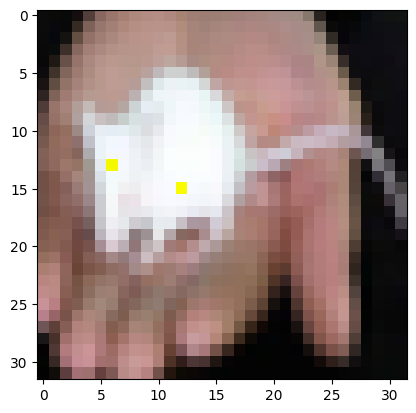

In [58]:
rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {label_dict[test_idx]}')
print(f'모델의 예측 : {label_dict[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate( list(label_dict.values()) ) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx])
plt.show()

* 틀린 이미지만 확인해보기

In [59]:
temp = (test_y_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

5832

idx = 5113
해당 인덱스의 이미지는 camel
모델의 예측 : leopard
모델의 클래스별 확률 : 
-------------------
apple 0.0
aquarium_fish 0.0
baby 1.0
bear 0.0
beaver 0.0
bed 0.0
bee 3.0
beetle 0.0
bicycle 0.0
bottle 0.0
bowl 0.0
boy 2.0
bridge 0.0
bus 0.0
butterfly 0.0
camel 7.0
can 0.0
castle 0.0
caterpillar 0.0
cattle 2.0
chair 0.0
chimpanzee 0.0
clock 0.0
cloud 0.0
cockroach 0.0
couch 0.0
cra 0.0
crocodile 0.0
cup 0.0
dinosaur 0.0
dolphin 0.0
elephant 1.0
flatfish 0.0
forest 0.0
fox 1.0
girl 3.0
hamster 0.0
house 0.0
kangaroo 6.0
keyboard 0.0
lamp 0.0
lawn_mower 0.0
leopard 17.0
lion 0.0
lizard 1.0
lobster 1.0
man 3.0
maple_tree 0.0
motorcycle 0.0
mountain 0.0
mouse 5.0
mushroom 0.0
oak_tree 0.0
orange 0.0
orchid 0.0
otter 0.0
palm_tree 0.0
pear 0.0
pickup_truck 0.0
pine_tree 0.0
plain 0.0
plate 0.0
poppy 0.0
porcupine 3.0
possum 3.0
rabbit 0.0
raccoon 9.0
ray 0.0
road 0.0
rocket 0.0
rose 0.0
sea 0.0
seal 0.0
shark 0.0
shrew 1.0
skunk 0.0
skyscraper 0.0
snail 0.0
snake 0.0
spider 0.0
squirrel 0.0
streetcar 0.0
su

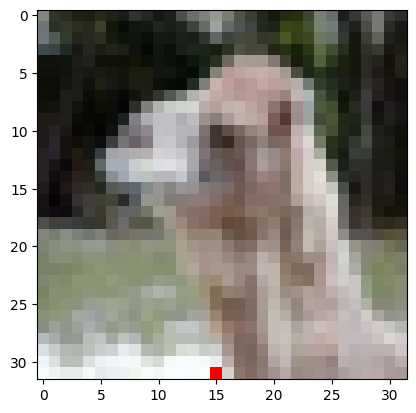

In [60]:
rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {label_dict[test_idx]}')
print(f'모델의 예측 : {label_dict[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate( list(label_dict.values()) ) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx] )
plt.show()